# Flight Price Prediction 


In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_excel('flight.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Basic checks


In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()   # all column are object except price 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.isnull().sum()  # their is 1 null value in total_stops and route

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
data.describe(include = 'O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
data[data.duplicated()]   # duplicate rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
data = data.drop_duplicates()  # droping duplicate rows

In [12]:
data = data.drop(['Additional_Info','Route'],axis =1)   # least impactful

In [13]:
data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [14]:
data['Source'].value_counts()

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [15]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [16]:
data['Total_Stops'].isnull().sum()

1

In [17]:
data.dropna(inplace = True)

In [18]:
data.isnull().sum()   # we have handled null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [19]:
data['Destination'].value_counts()     

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [20]:
data['Destination'].unique()     # New delhi is same as Delhi 

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
data['Destination'] = data['Destination'].replace('New Delhi','Delhi')

In [22]:
data['Destination'].unique()  # we have replaced New delhi with Delhi

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [23]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

### EDA

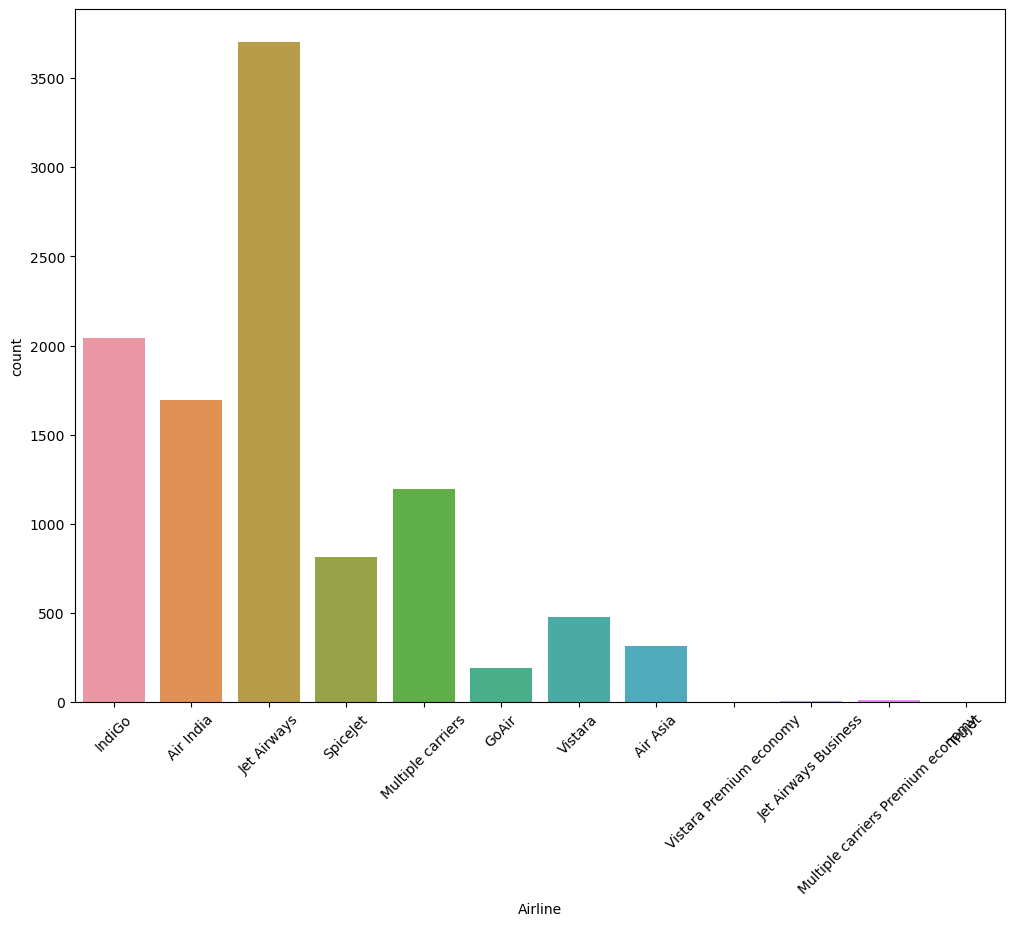

In [24]:
# count of airlines
plt.figure(figsize=(12, 9))
sns.countplot(x='Airline', data=data)
plt.xticks(rotation=45)
plt.show()

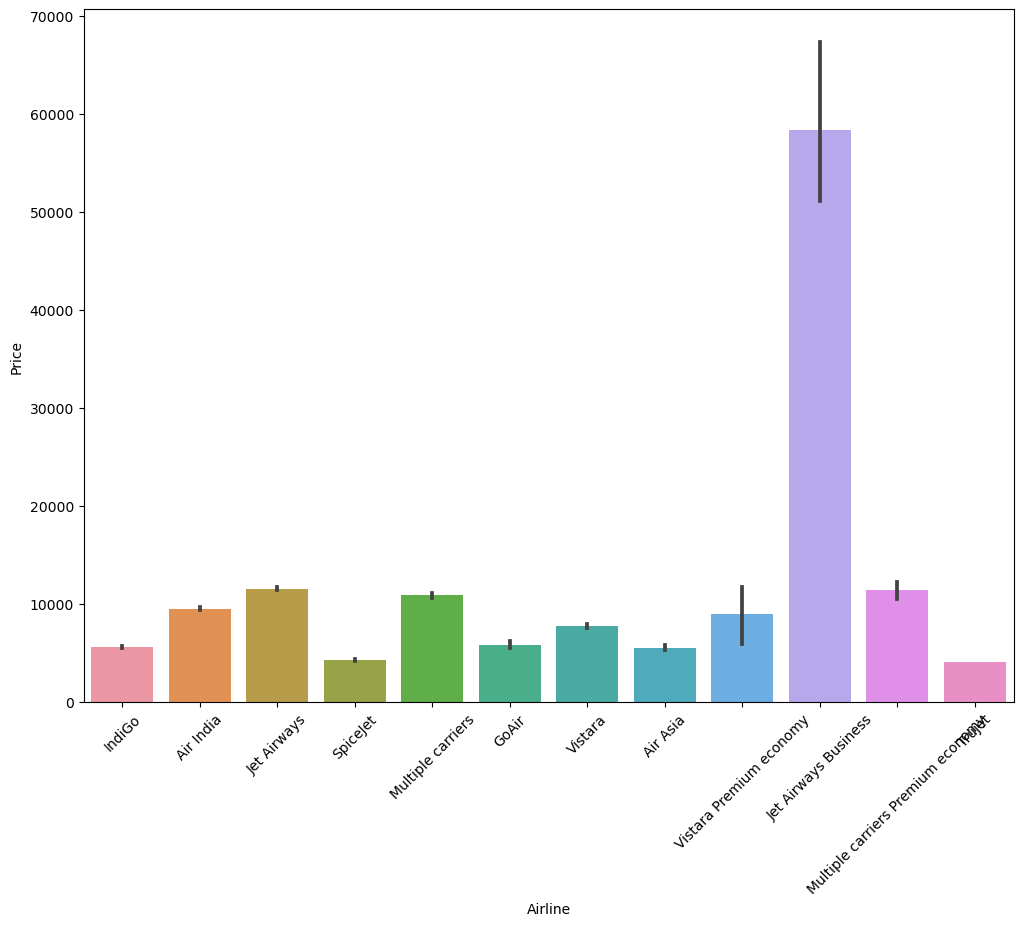

In [25]:
#Airline vs price
plt.figure(figsize = (12,9))
sns.barplot(x = 'Airline' , y = 'Price' , data = data)
plt.xticks(rotation =45)
plt.show()

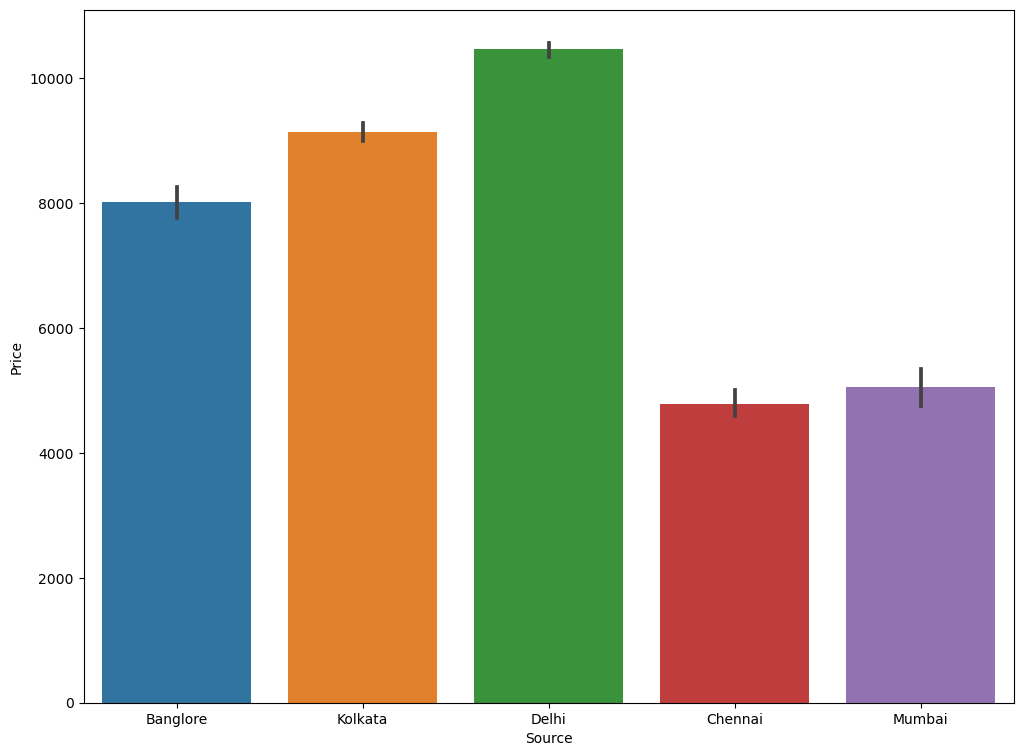

In [26]:
# source vs price
plt.figure(figsize = (12,9))
sns.barplot(x = 'Source' , y = 'Price' , data = data)
plt.show()

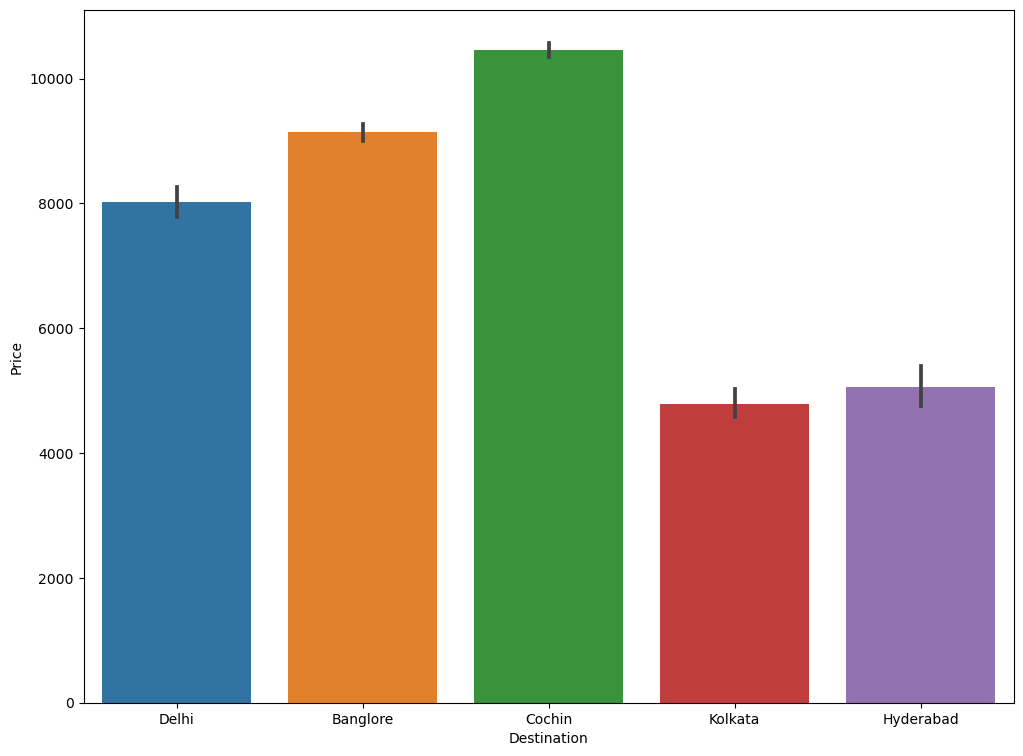

In [27]:
# destination vs price
plt.figure(figsize = (12,9))
sns.barplot(x = 'Destination' , y = 'Price' , data = data)
plt.show()

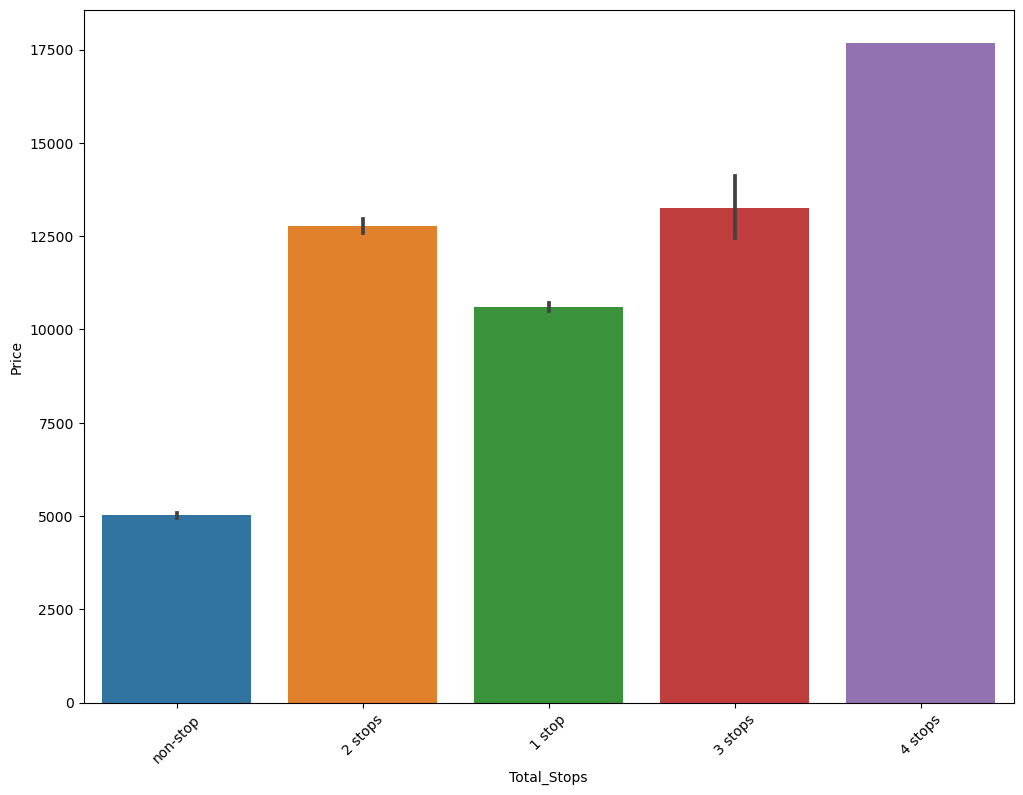

In [28]:
# Total stops vs price
# as no. of stops increases price also increases 
plt.figure(figsize = (12,9))
sns.barplot(x = 'Total_Stops' , y = 'Price' , data = data)
plt.xticks(rotation =45)
plt.show()


In [29]:
# Auto EDA
from ydata_profiling import ProfileReport
!pip install ydata-profiling
profile=ProfileReport(data,title="EDA",explorative=False)
profile

Defaulting to user installation because normal site-packages is not writeable


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# In above Auto EDA correlation we can see that source and destination are highly correlated to each other so we can drop them as well as retain them

### Preprocessing 

In [30]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648


In [31]:
data['Date_of_Journey'].value_counts()

Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

In [32]:
# we are going split Date_of_Journey into day and month but not year because year is same 2019

In [33]:
data['day'] = pd.to_datetime(data['Date_of_Journey']).dt.day
data['month'] = pd.to_datetime(data['Date_of_Journey']).dt.month

In [34]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3


In [35]:
# we are going to split dep_time and arrival_time into hours and minutes 

In [36]:
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [37]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,11,30,14,10


In [38]:
# we are going to split duration into hour and minutes 

In [39]:
duration = list(data['Duration'])

# Standardize all durations to have both hours and minutes
for i in range(len(duration)):
    if len(duration[i].split()) != 2:  # If there is not exactly 2 parts (hours and minutes)
        if "h" in duration[i]:  # If only hours are present
            duration[i] = duration[i].strip() + " 0m"  # Add 0m for minutes
        else:  # If only minutes are present
            duration[i] = "0h " + duration[i]  # Add 0h for hours

# Lists to store hours and minutes separately
duration_hrs = []
duration_min = []

# Loop through the standardized duration list
for i in range(len(duration)):
    # Split the duration on 'h' to extract hours
    duration_hrs.append(int(duration[i].split(sep="h")[0].strip()))
    # Split on 'm' to extract minutes
    duration_min.append(int(duration[i].split(sep="h")[1].split(sep="m")[0].strip()))

# If needed, create new columns in your DataFrame

print(duration_hrs)
print(duration_min)
data['Duration_hours'] = duration_hrs
data['Duration_minutes'] = duration_min

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3, 27, 7,

In [40]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,11,30,14,10,2,40


In [41]:
# deleting columns Date_of_Journey,Dep_Time,Arrival_Time and Duration

In [42]:
data =data.drop(['Date_of_Journey','Dep_Time','Arrival_Time', 'Duration'],axis =1 )

In [43]:
data

,Airline,Source,Destination,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [44]:
# we will apply one hot encoding to Airline,source and destination and replaces values of total_stops to number 

In [45]:
airline =pd.get_dummies(data['Airline'],dtype = int)
airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
source = pd.get_dummies(data['Source'], dtype = int)
source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [47]:
source.rename(columns={'Banglore': 'Banglore_Source', 'Chennai': 'Chennai_Source', 'Delhi' :' Delhi_Source', 'Kolkata' : 'Kolkata_Source', 'Mumbai' :'Mumbai_Source'}, inplace=True)
source.head()

,Banglore_Source,Chennai_Source,Delhi_Source,Kolkata_Source,Mumbai_Source
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [48]:
destination = pd.get_dummies(data['Destination'], dtype = int)
destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [49]:
data = pd.concat([data,airline,source,destination],axis = 1)  # adding the above columns which we got after applying OHE

In [50]:
data = data.drop(['Airline','Source','Destination'],axis =1)  # Droping original columns

In [51]:
data

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Banglore_Source,Chennai_Source,Delhi_Source,Kolkata_Source,Mumbai_Source,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,non-stop,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,1,0,0,0,0
10679,non-stop,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,1,0,0,0,0
10680,non-stop,7229,27,4,8,20,11,20,3,0,...,1,0,0,0,0,0,0,1,0,0
10681,non-stop,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


In [52]:
data.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore_Source', 'Chennai_Source',
       ' Delhi_Source', 'Kolkata_Source', 'Mumbai_Source', 'Banglore',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype='object')

In [53]:
data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [54]:
# replacing Total_stops with numeric values
data['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4},inplace = True)


In [55]:
data

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Banglore_Source,Chennai_Source,Delhi_Source,Kolkata_Source,Mumbai_Source,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,1,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


## Spliting the data 

In [56]:
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the data

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training 



In [58]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## Prediction

In [59]:
y_pred = model.predict(X_test_scaled)
y_pred

array([14629.77383333,  3844.2       ,  4296.55333333, ...,
       11086.51      ,  7665.52333333, 12721.01      ])

## Evaluation

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3815778.97
R² Score: 0.82


## Hyperparameter tuning 

In [61]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],       # Number of trees in the forest
    'max_depth': [10, 20, 40, None],       # Maximum depth of the tree
    'min_samples_split': [5, 10, 15],      # Minimum samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],        # Minimum samples required to be at a leaf node
    'bootstrap': [True]                    # Use bootstrap sampling
}


random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,              # Number of random combinations to try
    cv=3,                   # 3-fold cross-validation for speed
    n_jobs=-1,              # Use all available cores
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
print("Best Hyperparameters:", best_params)

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Mean Squared Error (MSE): 3528185.97
R² Score: 0.83


# Result


In [62]:
data

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Banglore_Source,Chennai_Source,Delhi_Source,Kolkata_Source,Mumbai_Source,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,1,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


In [63]:
print("\nEnter the following values for prediction:")

input_columns = ['Total_Stops', 'day', 'month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore_Source', 'Chennai_Source',
       ' Delhi_Source', 'Kolkata_Source', 'Mumbai_Source', 'Banglore',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata']

available_flights = [
    'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 
    'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 
    'Vistara Premium economy'
]

print("Available flights:")
for idx, flight in enumerate(available_flights, 1):
    print(f"{idx}. {flight}")

while True:
    try:
        flight_choice = int(input(f"Enter the number corresponding to your chosen flight (1-{len(available_flights)}): "))
        if 1 <= flight_choice <= len(available_flights):
            selected_flight = available_flights[flight_choice - 1]
            break
        else:
            print(f"Please enter a number between 1 and {len(available_flights)}.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

available_cities = {
    'Source': ['Banglore_Source', 'Chennai_Source',
       ' Delhi_Source', 'Kolkata_Source', 'Mumbai_Source'],
    'Destination': ['Banglore', 'Delhi', 'Kolkata', 'Cochin', 'Hyderabad']
}

source_city = input(f"Enter the source city ({', '.join(available_cities['Source'])}): ").strip()
destination_city = input(f"Enter the destination city ({', '.join(available_cities['Destination'])}): ").strip()

custom_input = []

for col in input_columns:
    if col == 'Total_Stops':
        value = int(input("Enter number of stops (0, 1, 2, 3, etc.): "))
    elif col == 'day':
        value = int(input("Enter the day of the journey (1 to 31): "))
    elif col == 'month':
        value = int(input("Enter the month of the journey (1 to 12): "))
    elif col == 'Dep_hour':
        value = int(input("Enter departure hour (0 to 23): "))
    elif col == 'Dep_min':
        value = int(input("Enter departure minute (0 to 59): "))
    elif col == 'Arrival_hour':
        value = int(input("Enter arrival hour (0 to 23): "))
    elif col == 'Arrival_min':
        value = int(input("Enter arrival minute (0 to 59): "))
    elif col == 'Duration_hours':
        value = int(input("Enter duration in hours: "))
    elif col == 'Duration_minutes':
        value = int(input("Enter duration in minutes: "))
    elif col == selected_flight:
        value = 1
    else:
        value = 0
    if col in available_cities['Source']:
        if col == source_city:
            value = 1
        else:
            value = 0
    if col in available_cities['Destination']:
        if col == destination_city:
            value = 1
        else:
            value = 0
    
    custom_input.append(value)

custom_input = [custom_input]
custom_prediction = best_rf_model.predict(custom_input)  

print(f"\nThe predicted price is: {custom_prediction[0]:.2f}")



Enter the following values for prediction:
Available flights:
1. Air Asia
2. Air India
3. GoAir
4. IndiGo
5. Jet Airways
6. Jet Airways Business
7. Multiple carriers
8. Multiple carriers Premium economy
9. SpiceJet
10. Trujet
11. Vistara
12. Vistara Premium economy


Enter the number corresponding to your chosen flight (1-12):  1
Enter the source city (Banglore_Source, Chennai_Source,  Delhi_Source, Kolkata_Source, Mumbai_Source):  Chennai_Source
Enter the destination city (Banglore, Delhi, Kolkata, Cochin, Hyderabad):  Banglore
Enter number of stops (0, 1, 2, 3, etc.):  1
Enter the day of the journey (1 to 31):  15
Enter the month of the journey (1 to 12):  3
Enter departure hour (0 to 23):  6
Enter departure minute (0 to 59):  10
Enter arrival hour (0 to 23):  8
Enter arrival minute (0 to 59):  20
Enter duration in hours:  14
Enter duration in minutes:  10



The predicted price is: 8681.72
